In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model
import tensorflow.keras as keras

np.set_printoptions(precision=4, suppress = True)

In [2]:
import vaegandemo

E = vaegandemo.encoder()
G = vaegandemo.generator()
D = vaegandemo.discriminator()

D.load_weights("./saved-models/D_training_.h5")
E.load_weights("./saved-models/E_training_.h5")
G.load_weights("./saved-models/G_training_.h5")



In [3]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[10]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1304697472.npz
(300, 64, 64, 3)


tf.Tensor(
[[[0.5374 0.3366 0.7365]
  [0.3538 0.8677 0.0852]
  [0.3088 0.1491 0.2693]
  ...
  [0.234  0.9999 0.1047]
  [0.0446 0.126  0.0574]
  [0.9476 0.9959 0.9874]]

 [[0.0453 0.143  0.2239]
  [0.9624 0.621  0.9795]
  [0.0736 0.9933 0.7183]
  ...
  [0.9996 0.9994 0.9986]
  [0.5445 1.     0.9688]
  [0.0266 1.     0.0019]]

 [[0.1398 0.8037 0.3862]
  [0.0026 0.806  0.0486]
  [0.0033 0.9739 0.0064]
  ...
  [0.     0.968  0.9987]
  [0.0008 0.3976 0.    ]
  [0.53   0.0056 1.    ]]

 ...

 [[0.     0.9907 0.8238]
  [0.9787 0.9999 1.    ]
  [0.     1.     0.9849]
  ...
  [1.     1.     1.    ]
  [0.4034 1.     1.    ]
  [0.     1.     0.    ]]

 [[0.0006 0.9975 0.7729]
  [0.     0.9993 0.9797]
  [0.     1.     0.0014]
  ...
  [0.     1.     1.    ]
  [0.     1.     0.    ]
  [0.8508 0.     1.    ]]

 [[0.001  0.9903 0.9978]
  [0.     1.     0.    ]
  [0.0355 0.1809 0.9998]
  ...
  [0.     1.     0.    ]
  [0.2736 0.     1.    ]
  [0.     1.     0.    ]]], shape=(64, 64, 3), dtype=float32)


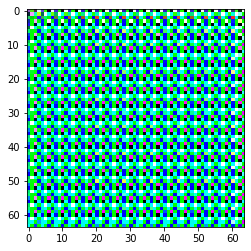

In [4]:
plt.gca().cla() 
latent, _ = E(obs_data)
z_decoded = G(latent)
print(z_decoded[10])
plt.imshow(z_decoded[10])

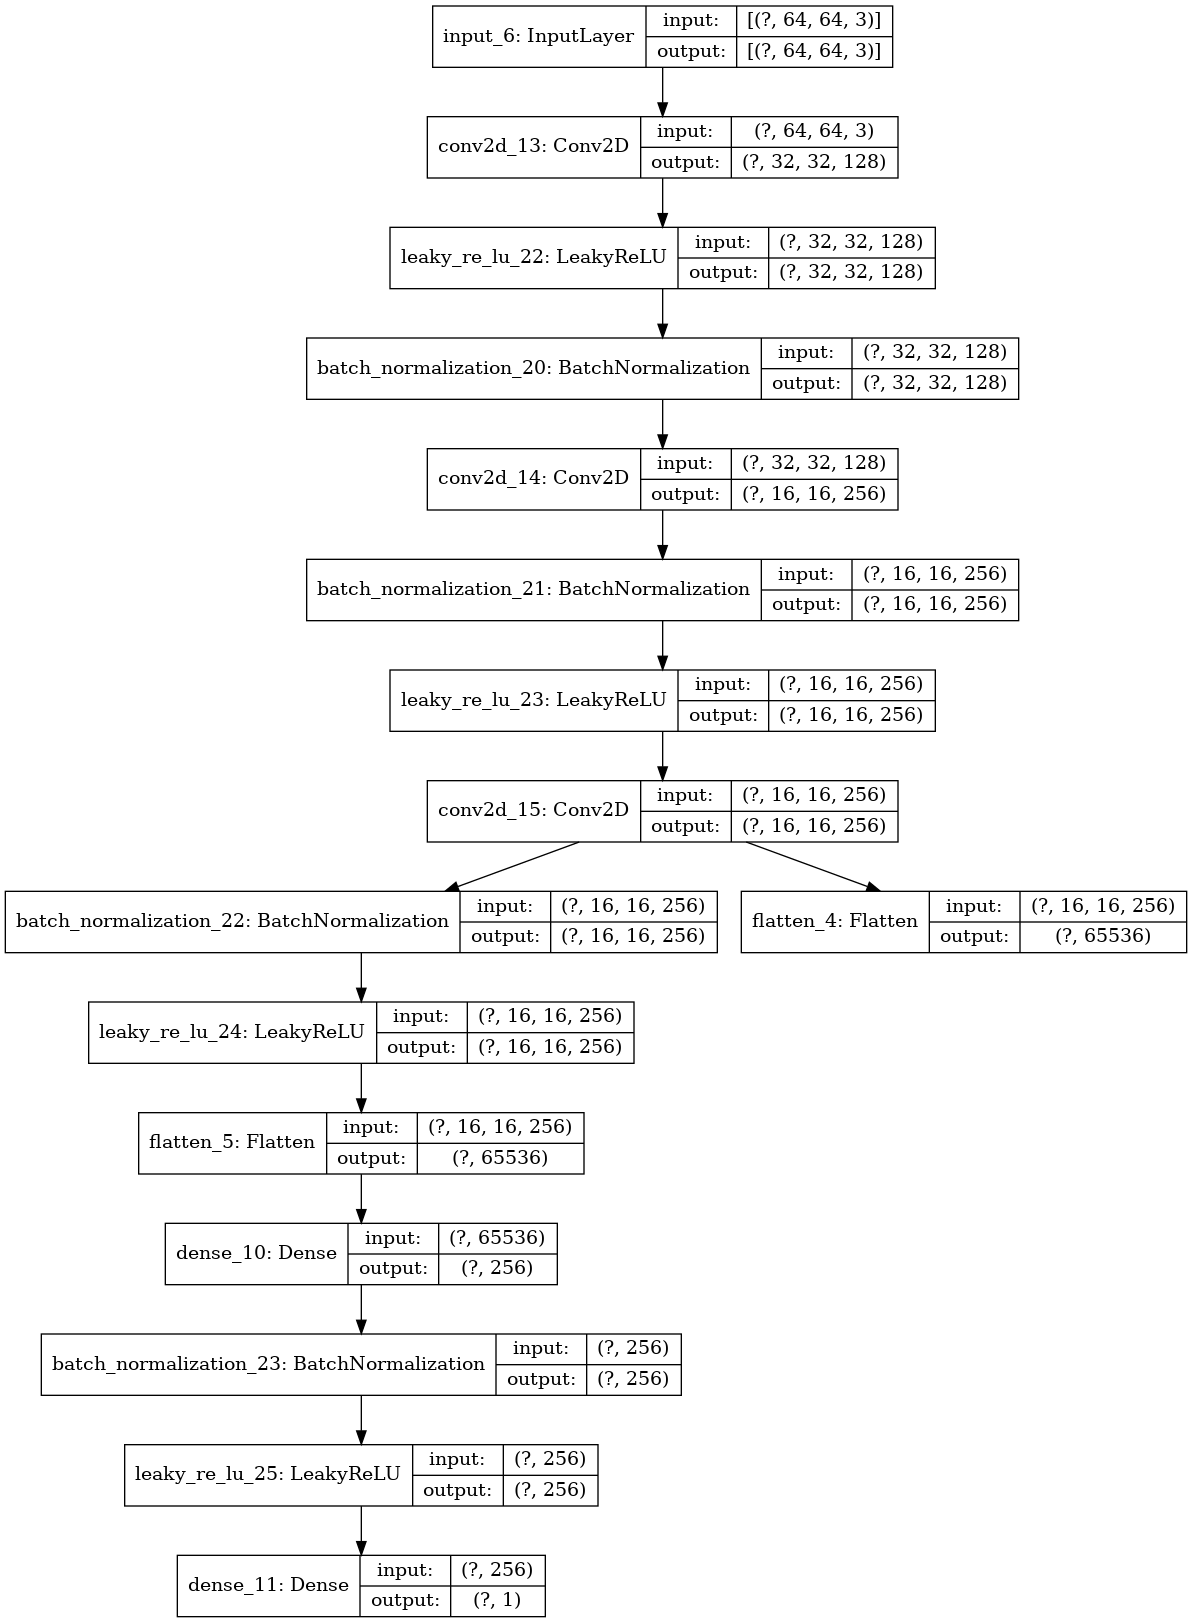

In [6]:
plot_model(E, to_file='./vae/VGen.png', show_shapes=True)
plot_model(G, to_file='./vae/VGgen.png', show_shapes=True)
plot_model(D, to_file='./vae/VGdis.png', show_shapes=True)

In [4]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[10]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1304697472.npz
(300, 64, 64, 3)


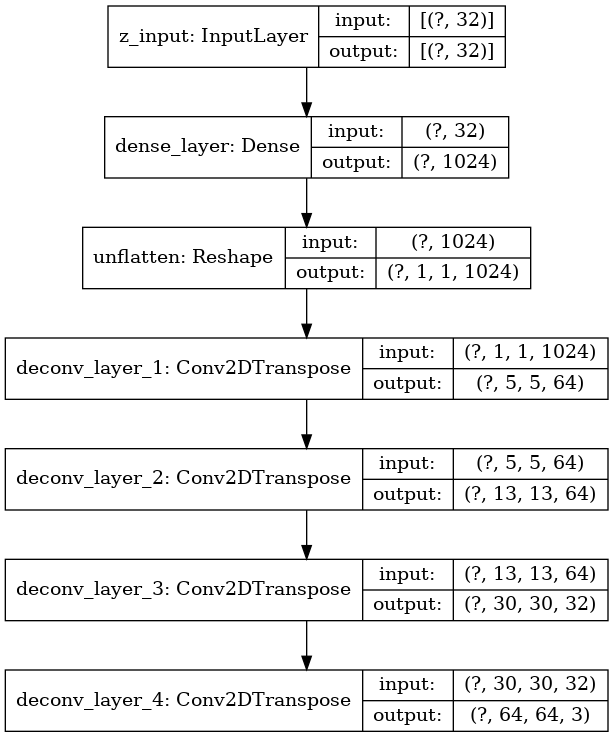

In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

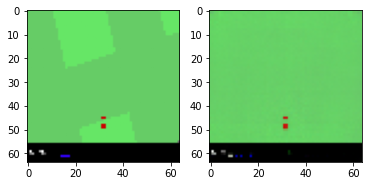

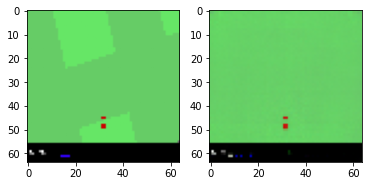

In [6]:
### output from one episode

for idx in range(0,100):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow(z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

[[[0.4141 0.7447 0.4002]
  [0.4066 0.7528 0.4039]
  [0.4061 0.7791 0.4109]
  ...
  [0.3962 0.8219 0.4027]
  [0.4095 0.8088 0.3993]
  [0.4001 0.7933 0.3952]]

 [[0.4045 0.7474 0.4149]
  [0.4075 0.7495 0.4149]
  [0.4054 0.7919 0.4136]
  ...
  [0.3987 0.8214 0.3944]
  [0.39   0.7937 0.4012]
  [0.395  0.8074 0.3996]]

 [[0.4103 0.7857 0.4056]
  [0.4044 0.7918 0.4094]
  [0.4122 0.7947 0.3992]
  ...
  [0.3986 0.8312 0.3953]
  [0.398  0.8284 0.3957]
  [0.3972 0.8202 0.3929]]

 ...

 [[0.0122 0.0022 0.0194]
  [0.0171 0.0012 0.0131]
  [0.0068 0.0009 0.0063]
  ...
  [0.0024 0.     0.0015]
  [0.0163 0.0055 0.0206]
  [0.0033 0.0048 0.0109]]

 [[0.009  0.0138 0.0075]
  [0.0049 0.0032 0.0059]
  [0.0038 0.0048 0.0038]
  ...
  [0.0041 0.0048 0.0028]
  [0.0088 0.0033 0.0069]
  [0.0149 0.0069 0.0047]]

 [[0.0032 0.0045 0.003 ]
  [0.005  0.0066 0.005 ]
  [0.0007 0.0005 0.0025]
  ...
  [0.001  0.0003 0.0021]
  [0.01   0.0027 0.0027]
  [0.004  0.0031 0.0017]]]


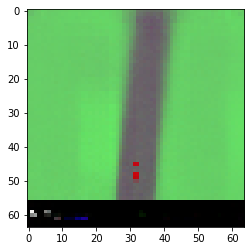

In [6]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[10]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

print(reconstruction)

plt.imshow(reconstruction)

# ax1 = plt.subplot(121)
# plt.imshow( obs)
# ax1.axis('off')
# ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
#          transform=ax1.transAxes)

# ax2 = plt.subplot(122)
# plt.imshow( reconstruction)
# ax2.axis('off')
# ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
#          transform=ax2.transAxes);


In [9]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ 0.3058  0.1702  0.0768  0.0361  0.0417  0.3824  0.2086 -0.0609 -0.3551
 -0.39    0.1496  0.2834  1.7678  0.3427 -0.0582 -0.0598  0.1203 -2.094
 -0.0773 -0.0712  0.2239  0.0635  0.0717 -0.2336  0.2231  0.0799 -0.1977
  0.0311  0.1395  0.0175 -0.3799  0.1035]
log_var = [-0.1772 -0.0355 -0.1311 -0.045  -1.704  -0.4124  0.0404 -0.2317 -0.228
 -1.0422 -0.0137 -0.1206 -2.7797 -0.3011 -0.0891 -0.448  -0.2292 -2.7265
 -0.1126 -0.0788 -0.1837 -0.0227  0.0273 -0.6444 -0.1746 -0.0133 -4.4802
 -0.1969 -0.1569 -2.5447 -1.7489 -0.2148]
z = [[ 0.3058  0.1702  0.0768  0.0361  0.0417  0.3824  0.2086 -0.0609 -0.3551
  -0.39    0.1496  0.2834  1.7678  0.3427 -0.0582 -0.0598  0.1203 -2.094
  -0.0773 -0.0712  0.2239  0.0635  0.0717 -0.2336  0.2231  0.0799 -0.1977
   0.0311  0.1395  0.0175 -0.3799  0.1035]]


informative dimensions:


array([ 4,  9, 12, 17, 23, 26, 29, 30])

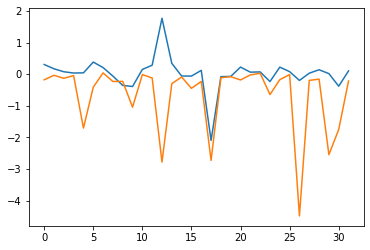

In [10]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [11]:
file1 = os.listdir(DIR_NAME)[10]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[14]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [12]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[-0.0509, -0.0123,  0.0373,  0.0409,  0.0099, -0.2013,  0.0302,
          0.1311,  0.1344, -0.2036,  0.1214, -0.0311,  1.1232, -0.046 ,
         -0.097 ,  0.0196, -0.1385,  0.5729, -0.0581, -0.1249,  0.0018,
         -0.028 ,  0.0081,  0.1039, -0.0602,  0.0263, -0.0224,  0.0016,
         -0.0018, -1.8286,  0.1802,  0.0326]], dtype=float32),
 array([[-0.0986, -0.0499,  0.0321, -0.0231, -0.8442, -0.1561,  0.0007,
         -0.0541, -0.1447, -0.6443,  0.0452, -0.1058, -3.2856, -0.0579,
         -0.1063, -0.0881, -0.0939, -1.8068, -0.0383, -0.0183, -0.108 ,
         -0.0485, -0.01  , -0.1711, -0.0432,  0.0147, -3.3489, -0.0334,
         -0.1149, -3.1065, -1.7575, -0.0236]], dtype=float32),
 array([[-0.8062,  1.6914,  0.4204,  1.0974,  0.7832,  1.5936, -0.1721,
          1.2031, -0.2155, -0.471 , -0.2965,  1.0177,  1.3653,  1.3938,
         -0.3391, -0.7159, -1.4785,  1.1812, -1.2481,  0.8237, -0.3683,
          0.1879,  0.9706, -0.6547, -1.0898,  1.6907,  0.2682, -1.1879,
          

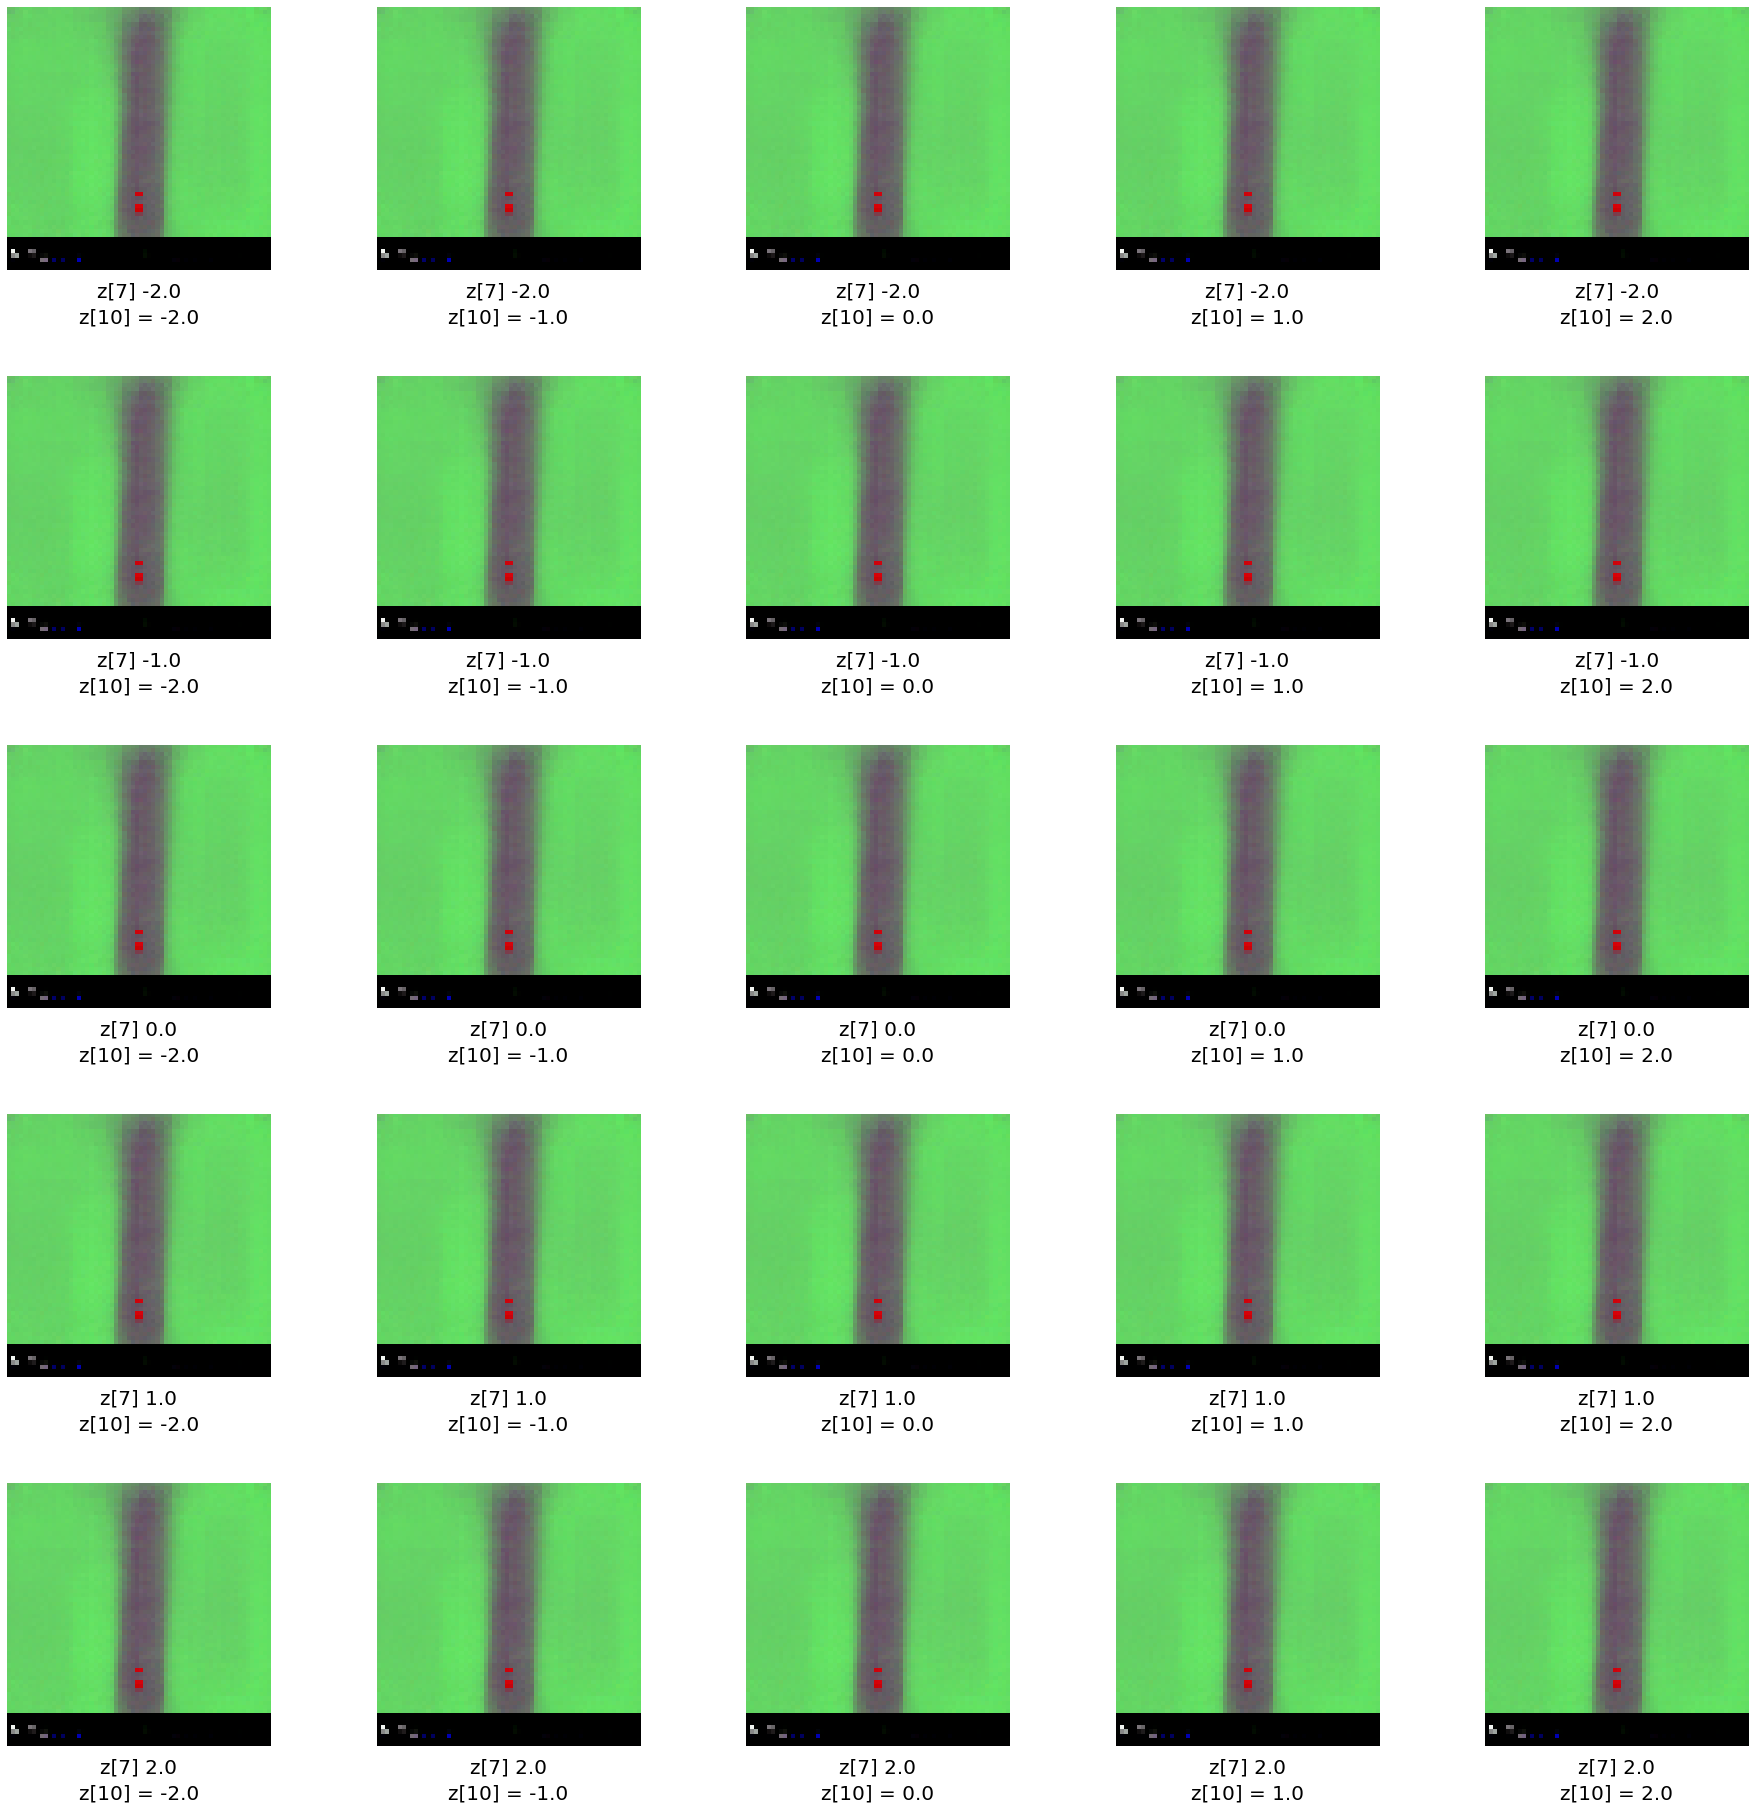

In [13]:
top_left = vae.encoder.predict(np.array([obs_data1[2]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[6]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[8]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[6]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [27]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [28]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=1.4343215227127075, description='z0', max=3.0, min=-3.0), FloatSlider(…

<function __main__.play_with_z(z0=1.4343215, z2=0.45312244, z4=0.3137855, z5=0.40902102, z6=0.07503459, z7=0.7928933, z10=-1.3692871, z15=-0.02346772, z24=1.1126537, z25=-1.1927497, z27=-0.64665323)>